<a href="https://www.kaggle.com/fernandobordi/fb-limpieza-de-datos?scriptVersionId=88414586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Limpieza de datos


**Limpieza de datos** (o *data cleaning*) es una tarea común que se realiza cuando se trabaja en procesos de **ciencia de datos**. Consiste en realizar una serie de tareas que buscan  detectar, eliminar,corregir o transformar cualquier anomalía, perturbación o irrelevancia de los datos.


In [1]:
# Práctica: se presenta un caso de análisis de datos donde primero hay que realizar tareas de "limpieza de datos" a los 
# efectos de prepararlos para su procesamiento posterior

# Fernando Bordignon - http://saberesdigitales.unipe.edu.ar
 
# Vamos a empezar nuestro programa Python cargando una serie de librerías 
# que nos van a permitir manejar las herramientas que seleccionamos

import pandas as pd      # manejo de estructuras series y dataframes
import numpy as np       # manejo de vectores y matrices
import matplotlib.pyplot as plt # manejo de gráficos


Siendo más directo, podemos decir que **la limpieza de datos se necesita para**:

1 **Eliminar datos extremos** (*outliers*): Un datos outlier es aquel que se aleja significativamente del promedio del resto de nuestros datos. Un consejo para detectarlos es graficarlos, así se observvan mucho mejor porque contrastan con el resto del conjunto de datos. 

Vamos a mostrar un **ejemplo** de detección gráfica de un dato outlier

<function matplotlib.pyplot.show(close=None, block=None)>

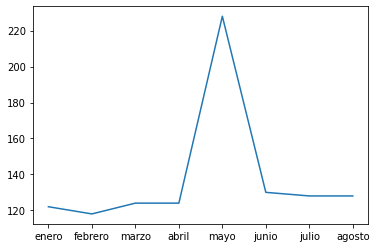

In [2]:
#  Creamos dos series para luego graficarlas.
#  Representan la paga mensual de un jubilado

x = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto"]
y = [122, 118, 124, 124, 228, 130, 128, 128]

plt.plot(x,y)
plt.show


En el gráfico anterior que hay un dato outlier posible en el mes de mayo, seguramente alguien tipeó 228 en vez de 128.

Verificado el error, una **forma de corregirlo** es la siguiente:

In [3]:
# Se accede al quinto elemento de la serie "y" y se almacena el valor 128. Los elementos de una serie o dataframe empiezan desde el cero

y[4] = 128
y

[122, 118, 124, 124, 128, 130, 128, 128]

2- **Trabajar datos Nulos** (*missing data*):  Un dato nulo en una variable o en un elemento de una serie o dataframe indica que no se ha introducido información alguna. Un dato nulo es inexistencia de dato, no es cero ni cadena de texto vacía. Debemos revisar nuestros conjuntos de datos a procesar para detectar si hay datos nulos, es importante que lo sepamos, ya sea para completarlos o bien tener en cuenta esta situación durante las tareas de procesamiento.

Vamos a un ejemplo:

In [4]:
# Creamos un dataframe de 3 columnas y 5 registros, donde los valores del atributo ocupación 
# no están definidos ni el valor de salario del segundo registro. El lenguaje los muestra los datos nulos como "NaN". 
# Un dato nulo se carga como "np.nan"

df = pd.DataFrame({'edad':[20,21,23,19,22],
                'salario':[10000,np.nan,9900,8500,15000]},
                columns = ['edad', 'salario', 'ocupacion'])

df

,edad,salario,ocupacion
0,20,10000.0,NaN
1,21,NaN,NaN
2,23,9900.0,NaN
3,19,8500.0,NaN
4,22,15000.0,NaN


3- **Eliminar o transformar datos erróneos e irrelevantes**: Son aquellos datos que almacenan información fuera de contexto, que no responde a la semántica del dato. Por ejemplo; una carga de combustible, en un surtidor en litros, con un valor negativo o un número como nombre una persona.

Un caso de limpieza de datos, ahora trabajaremos con un dataframe que representa

In [5]:
caso = pd.DataFrame({'proyecto':['Alfa','Beta','Gamma','Delta','Epsilon','Ji','Pi','Zeta'],
                     'empleados':[3,5,3,8,5,6,3,3],
                     'presupuesto':[9000,11900,7500,11000,np.nan,np.nan,14000,4500],
                     'avance':[20,np.nan,80,70,55,92,24,33],
                     'horas_semana':[66,np.nan,35,30,24,np.nan,22,30]},
                      columns = ['proyecto', 'empleados', 'presupuesto','avance','horas_semana'])
caso

,proyecto,empleados,presupuesto,avance,horas_semana
0,Alfa,3,9000.0,20.0,66.0
1,Beta,5,11900.0,NaN,NaN
2,Gamma,3,7500.0,80.0,35.0
3,Delta,8,11000.0,70.0,30.0
4,Epsilon,5,NaN,55.0,24.0
5,Ji,6,NaN,92.0,NaN
6,Pi,3,14000.0,24.0,22.0
7,Zeta,3,4500.0,33.0,30.0


Primer paso: **detección de datos nulos**

Vamos a usar "Isnull" para detectar datos nulos.

In [6]:
# Aplicamos el método isnull al dataframe

caso.isnull()

,proyecto,empleados,presupuesto,avance,horas_semana
0,False,False,False,False,False
1,False,False,False,True,True
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,True,False,False
5,False,False,True,False,True
6,False,False,False,False,False
7,False,False,False,False,False


Segundo paso: **eliminación de filas con datos nulos**

El método dropna() elimina las filas o registros que contienen datos nulos. Si en un proyecto es pertinente eliminar tales registros entonces puede usarse esta opción.

In [7]:
# aplicamos dropna para eliminar filas con datos nulos

caso_sin_nulos = caso.dropna()

caso_sin_nulos

,proyecto,empleados,presupuesto,avance,horas_semana
0,Alfa,3,9000.0,20.0,66.0
2,Gamma,3,7500.0,80.0,35.0
3,Delta,8,11000.0,70.0,30.0
6,Pi,3,14000.0,24.0,22.0
7,Zeta,3,4500.0,33.0,30.0


Tercer paso: **reemplazo de datos nulos por un valor determinado**

El método fillna() rellena los valores nulos con un valor dado. 

In [8]:
# aplicamos fillna para completar los datos nulos con cero

caso_reemplazo = caso.fillna(value=0)

caso_reemplazo

,proyecto,empleados,presupuesto,avance,horas_semana
0,Alfa,3,9000.0,20.0,66.0
1,Beta,5,11900.0,0.0,0.0
2,Gamma,3,7500.0,80.0,35.0
3,Delta,8,11000.0,70.0,30.0
4,Epsilon,5,0.0,55.0,24.0
5,Ji,6,0.0,92.0,0.0
6,Pi,3,14000.0,24.0,22.0
7,Zeta,3,4500.0,33.0,30.0


También podríamos detectar **valores duplicados** de datos en columnas. Por ejemplo en un padrón el número de DNI debería estar una sola vez, es decir en una sola fila. 

In [9]:
# El método duplicado a una columna muestra si hay datos duplicados

caso[caso.duplicated(['empleados'])]

# Una fila cualquiera se puede eliminar con el método drop
# Por ejemmplo caso.drop([2],axis=0) el registro 2 que está duplicado

,proyecto,empleados,presupuesto,avance,horas_semana
2,Gamma,3,7500.0,80.0,35.0
4,Epsilon,5,NaN,55.0,24.0
6,Pi,3,14000.0,24.0,22.0
7,Zeta,3,4500.0,33.0,30.0


Otra tarea de asociada a la limpieza de datos es la **normalización.** La cual implica aplicar un cierto patrón de uniformidad a ciertos datos.

In [10]:
# Vamos a normalizar la columna proyecto del dataframe caso para que todos los nombres queden en mayúsculas

caso['proyecto'] = caso['proyecto'].str.upper()

caso

,proyecto,empleados,presupuesto,avance,horas_semana
0,ALFA,3,9000.0,20.0,66.0
1,BETA,5,11900.0,NaN,NaN
2,GAMMA,3,7500.0,80.0,35.0
3,DELTA,8,11000.0,70.0,30.0
4,EPSILON,5,NaN,55.0,24.0
5,JI,6,NaN,92.0,NaN
6,PI,3,14000.0,24.0,22.0
7,ZETA,3,4500.0,33.0,30.0


In [11]:
# Vamos a convertir los presupuestos en dólares a rupias

caso['presupuesto'] = caso['presupuesto']/6.3

caso

,proyecto,empleados,presupuesto,avance,horas_semana
0,ALFA,3,1428.571429,20.0,66.0
1,BETA,5,1888.888889,NaN,NaN
2,GAMMA,3,1190.476190,80.0,35.0
3,DELTA,8,1746.031746,70.0,30.0
4,EPSILON,5,NaN,55.0,24.0
5,JI,6,NaN,92.0,NaN
6,PI,3,2222.222222,24.0,22.0
7,ZETA,3,714.285714,33.0,30.0


Bueno, recuerden **grabar sus "datos limpios"**. 

Si desean almacenarlos en un archivo externo csv pueden usar la siguiente orden

In [12]:

caso.to_csv('caso.csv') #  Revisa, sobre la derecha, el área "output" allí está el archivo generado

**Fin del cuaderno** dedicado a la limpieza de datos.

*Ci vediamo dopo cari amici*